In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
col_name = 'Year', 'Month', 'Day', 'UTC Hour', 'PM2.5', 'PM10_mask', 'Retrospective'

In [4]:
url = "http://berkeleyearth.lbl.gov/air-quality/maps/cities/Thailand/Bangkok/Bangkok.txt"
df = pd.read_csv(url,sep="\t",skiprows =10,names=col_name)

In [5]:
df

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1.0,0
1,2016,3,3,9,62.9,1.0,0
2,2016,3,3,10,55.5,1.0,0
3,2016,3,3,11,55.5,1.0,0
4,2016,3,3,12,47.9,1.0,0
...,...,...,...,...,...,...,...
37365,2023,1,1,20,35.3,0.0,0
37366,2023,1,1,20,35.3,0.0,0
37367,2023,1,1,20,35.3,0.0,0
37368,2023,1,1,20,35.3,0.0,0


In [6]:
df = df.drop(['PM10_mask','Retrospective'],axis=1)

In [7]:
df

,Year,Month,Day,UTC Hour,PM2.5
0,2016,3,3,8,62.9
1,2016,3,3,9,62.9
2,2016,3,3,10,55.5
3,2016,3,3,11,55.5
4,2016,3,3,12,47.9
...,...,...,...,...,...
37365,2023,1,1,20,35.3
37366,2023,1,1,20,35.3
37367,2023,1,1,20,35.3
37368,2023,1,1,20,35.3


In [8]:
df.rename(columns={'UTC Hour' : 'Hour'},inplace=True)

In [9]:
df

,Year,Month,Day,Hour,PM2.5
0,2016,3,3,8,62.9
1,2016,3,3,9,62.9
2,2016,3,3,10,55.5
3,2016,3,3,11,55.5
4,2016,3,3,12,47.9
...,...,...,...,...,...
37365,2023,1,1,20,35.3
37366,2023,1,1,20,35.3
37367,2023,1,1,20,35.3
37368,2023,1,1,20,35.3


In [10]:
df['DateTime']=pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']]) + pd.to_timedelta(7,unit='h')
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [11]:
df

,Year,Month,Day,Hour,PM2.5,DateTime,Date
0,2016,3,3,8,62.9,2016-03-03 15:00:00,2016-03-03
1,2016,3,3,9,62.9,2016-03-03 16:00:00,2016-03-03
2,2016,3,3,10,55.5,2016-03-03 17:00:00,2016-03-03
3,2016,3,3,11,55.5,2016-03-03 18:00:00,2016-03-03
4,2016,3,3,12,47.9,2016-03-03 19:00:00,2016-03-03
...,...,...,...,...,...,...,...
37365,2023,1,1,20,35.3,2023-01-02 03:00:00,2023-01-01
37366,2023,1,1,20,35.3,2023-01-02 03:00:00,2023-01-01
37367,2023,1,1,20,35.3,2023-01-02 03:00:00,2023-01-01
37368,2023,1,1,20,35.3,2023-01-02 03:00:00,2023-01-01


In [89]:
df['DayName'] = df['DateTime'].dt.strftime('%A')
df['MonthName'] = df['DateTime'].dt.strftime('%B')

In [109]:
day_dict = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [96]:
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

In [90]:
df

,Year,Month,Day,Hour,PM2.5,DateTime,Date,DayName,MonthName
0,2016,3,3,8,62.9,2016-03-03 15:00:00,2016-03-03,Thursday,March
1,2016,3,3,9,62.9,2016-03-03 16:00:00,2016-03-03,Thursday,March
2,2016,3,3,10,55.5,2016-03-03 17:00:00,2016-03-03,Thursday,March
3,2016,3,3,11,55.5,2016-03-03 18:00:00,2016-03-03,Thursday,March
4,2016,3,3,12,47.9,2016-03-03 19:00:00,2016-03-03,Thursday,March
...,...,...,...,...,...,...,...,...,...
37365,2023,1,1,20,35.3,2023-01-02 03:00:00,2023-01-01,Monday,January
37366,2023,1,1,20,35.3,2023-01-02 03:00:00,2023-01-01,Monday,January
37367,2023,1,1,20,35.3,2023-01-02 03:00:00,2023-01-01,Monday,January
37368,2023,1,1,20,35.3,2023-01-02 03:00:00,2023-01-01,Monday,January


In [ ]:
YearCount = df[['Year']].value_counts().reset_index()
YearCount.columns=['Year','Count']
YearCount

In [ ]:
MonthCount = df[['MonthName']].value_counts().reset_index()
MonthCount.columns = ['Month','Count']
MonthCount 

In [ ]:
DayCount = df[['DayName']].value_counts().reset_index()
DayCount.columns = ['Day','Count']
DayCount.sort_values()

In [ ]:
HourCount = df[['Hour']].value_counts().reset_index()
HourCount.columns =['Hour','Count']
HourCount

In [140]:
daydf = df.groupby('DayName')['PM2.5'].agg(['min','mean','median','std','max']).reset_index()
daydf = daydf.sort_values('DayName', key = lambda x : x.apply (lambda x : day_dict[x]))
daydf

,DayName,min,mean,median,std,max
1,Monday,4.7,26.051948,21.6,14.867864,103.4
5,Tuesday,4.1,26.666243,24.8,13.502103,91.2
6,Wednesday,3.7,25.739150,22.2,14.331270,104.1
4,Thursday,3.3,24.912710,21.9,13.045260,114.3
0,Friday,2.5,24.710644,21.3,13.479695,115.4
2,Saturday,4.3,24.747961,21.5,12.628687,93.4
3,Sunday,4.1,24.244560,20.5,13.644469,96.3


In [137]:
monthdf = df.groupby('MonthName')['PM2.5'].agg(['min','mean','median','std','max']).reset_index()
monthdf = monthdf.sort_values('MonthName', key = lambda x : x.apply (lambda x : month_dict[x]))
monthdf

,MonthName,min,mean,median,std,max
4,January,7.5,38.563649,35.3,16.404089,107.4
3,February,6.5,39.018665,36.8,16.282163,114.3
7,March,8.9,31.326189,32.0,11.062681,115.4
0,April,6.6,26.509722,24.9,9.945157,68.8
8,May,3.3,18.347184,17.2,7.095003,49.9
6,June,4.3,15.475902,14.5,5.657307,43.6
5,July,4.9,15.489912,14.9,4.850857,48.8
1,August,3.8,15.702506,14.6,5.909651,49.7
11,September,2.5,18.393624,16.5,8.927274,77.0
10,October,4.8,23.749322,22.0,9.909680,75.4


In [120]:
yeardf = df.groupby(['Year'])['PM2.5'].agg(['min','mean','median','std','max']).reset_index()
yeardf

,Year,min,mean,median,std,max
0,2016,2.5,24.424345,21.1,13.845628,94.2
1,2017,3.3,25.098466,22.1,12.623972,115.4
2,2018,4.8,25.059616,20.6,14.410022,114.3
3,2019,5.7,26.618134,23.8,13.728075,96.3
4,2020,5.1,22.547483,17.9,14.700350,107.4
5,2021,27.1,31.992730,32.0,0.188741,32.0
6,2022,8.6,30.073349,27.6,11.305919,108.1
7,2023,23.7,34.976016,35.3,1.911927,43.4


In [92]:
hourdf = df.groupby(['Hour'])['PM2.5'].agg(['min','mean','median','std','max'])
hourdf

,min,mean,median,std,max
Hour,,,,,
0,3.8,24.109786,20.20,14.575334,103.6
1,3.3,25.346859,21.30,14.868571,107.4
2,5.3,27.436186,23.15,15.607040,115.4
3,5.5,27.320569,23.20,15.189766,114.3
4,6.2,26.232878,22.70,14.193828,98.8
5,5.6,25.807105,22.20,13.590254,95.3
6,5.4,25.054817,21.60,12.604055,85.1
7,5.4,24.384124,21.40,11.928964,84.7
8,6.4,24.260594,21.70,11.635380,86.2


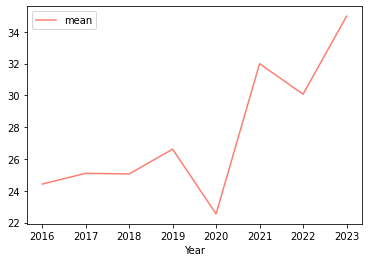

In [131]:
yeardf[['Year','mean']].plot(x='Year' , y='mean',kind="line",color = 'salmon')

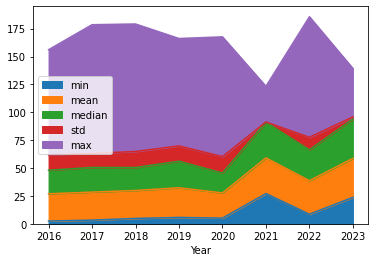

In [135]:
yeardf.plot.area(x='Year' , y=['min','mean','median','std','max'])

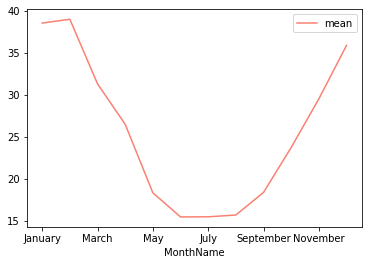

In [139]:
monthdf[['MonthName','mean']].plot(x='MonthName' , y='mean',kind="line",color = 'salmon')

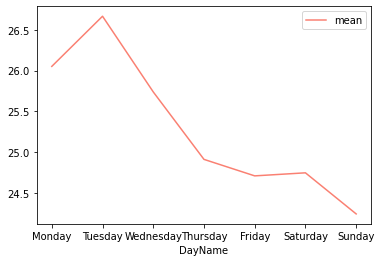

In [141]:
daydf[['DayName','mean']].plot(x='DayName' , y='mean',kind="line",color = 'salmon')